Optimal Path: [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


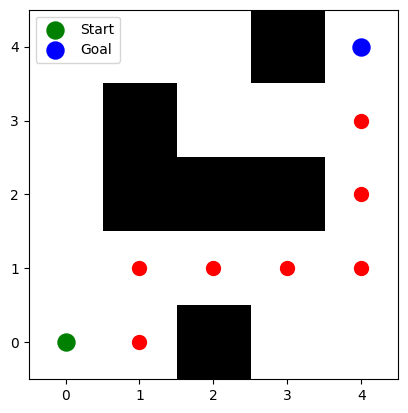

In [1]:
# Robot Navigation in a Simple Maze using DFS

import matplotlib.pyplot as plt
import numpy as np

# 1. Maze Representation (0 = open, 1 = wall)
maze = [
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)  # Starting position
goal = (4, 4)   # Goal position


# 2. Get Neighboring Cells
def get_neighbors(maze, cell):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    rows, cols = len(maze), len(maze[0])

    for dr, dc in directions:
        nr, nc = cell[0] + dr, cell[1] + dc
        if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
            neighbors.append((nr, nc))
    return neighbors


# 3. Depth-First Search (DFS) Implementation
def dfs(maze, start, goal):
    stack = [start]
    visited = set([start])
    parent = {start: None}

    while stack:
        current = stack.pop()
        if current == goal:
            break
        for neighbor in get_neighbors(maze, current):
            if neighbor not in visited:
                stack.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current

    # Path Reconstruction
    path = []
    step = goal
    while step is not None:
        path.append(step)
        step = parent.get(step)
    path.reverse()
    return path


# 4. Run DFS and Display Path
path = dfs(maze, start, goal)
print("Optimal Path:", path)


# 5. Visualization
def visualize_maze(maze, path):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap="binary")  # binary colormap: walls = black, open = white

    # Mark path cells
    for (r, c) in path:
        plt.scatter(c, r, c='red', s=100)

    # Mark start & goal
    plt.scatter(start[1], start[0], c='green', s=150, label='Start')
    plt.scatter(goal[1], goal[0], c='blue', s=150, label='Goal')

    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()


visualize_maze(maze, path)
